# Data Exploration       
## Set Ups:

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Import the Dataset

### House Price Dataset
This dataset consists of 188K rows of house prices from cities all over India. It's a great resource for analyzing housing trends and prices in different Indian cities.

In [30]:
housing = pd.read_csv("house_prices.csv", keep_default_na=False)#, na_values='null')
housing_copy = housing

## Summary of the Dataset:

In [31]:
# Take a look at the data
pd.set_option('display.max_columns', None)
housing.head()

housing_copy.iloc[420]


Index                                                              420
Title                2 BHK Ready to Occupy Flat for sale in Cosmos ...
Description          This lovely 2 BHK Flat in Thane West, Thane is...
Amount(in rupees)                                             1.60 Cr 
Price (in rupees)                                                16162
location                                                         thane
Carpet Area                                                           
Status                                                   Ready to Move
Floor                                                     19 out of 20
Transaction                                                     Resale
Furnishing                                              Semi-Furnished
facing                                                                
overlooking                                                           
Society                                               Cosmos Mary Park
Bathro

**Data Description**\
The House Price dataset provides valuable information about residential properties, encompassing a range of features such as carpet area, property status, floor, transaction type, furnishing, facing, overlooking, society name, bathroom count, balcony count, car parking availability, ownership type, super area, dimensions, plot area, property title, total amount, price per square foot, and a description of the property's location. This dataset offers insights into the dynamics of the housing market and can aid buyers, sellers, and real estate professionals in making informed decisions.

In [32]:
# Check for datatype and corresponding missing values 
housing.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,,,Srushti Siddhi Mangal Murti Complex,1,2,,,,,
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,,1 Open,Freehold,,,
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,,1 Covered,Freehold,,,
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,,,,1,1,,,,,
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,,1 Covered,Co-operative Society,,,


In [33]:
na_rows = housing.isna().sum(axis=0)
na_rows

Index                0
Title                0
Description          0
Amount(in rupees)    0
Price (in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Society              0
Bathroom             0
Balcony              0
Car Parking          0
Ownership            0
Super Area           0
Dimensions           0
Plot Area            0
dtype: int64

**Check for unique identifiers**

In [34]:
housing.nunique()

Index                187531
Title                 32446
Description           65635
Amount(in rupees)      1561
Price (in rupees)     10959
location                 81
Carpet Area            2759
Status                    2
Floor                   948
Transaction               5
Furnishing                4
facing                    9
overlooking              20
Society               10377
Bathroom                 12
Balcony                  12
Car Parking             230
Ownership                 5
Super Area             2977
Dimensions                1
Plot Area                 1
dtype: int64

## Converting types of the variables

1. Amount (in repees) - change cr to lac and delete lac, so the unit is also lac after the transformation

In [35]:
housing["Amount(in rupees)"]


# Function to convert values
def convert_amount(value):
    if 'Cr' in value:
        # Remove ' Cr' and convert to float
        return float(value.replace(' Cr', '')) * 100
    elif 'Lac' in value:
        # Remove ' Lac' and convert to float
        return float(value.replace(' Lac', ''))
    else:
        # Handle non-numeric values (e.g., 'Call for Price')
        return None

# Apply the conversion
housing['Amount(in rupees)'] = housing['Amount(in rupees)'].apply(convert_amount)

# Convert to float64 and handle any NaN if needed
housing['Amount(in rupees)'] = pd.to_numeric(housing['Amount(in rupees)'])

print(housing['Amount(in rupees)'])

0          42.0
1          98.0
2         140.0
3          25.0
4         160.0
          ...  
187526     63.0
187527     55.0
187528     76.0
187529     30.0
187530    118.0
Name: Amount(in rupees), Length: 187531, dtype: float64


2. Price - to numeric

In [36]:
housing["Price (in rupees)"] = pd.to_numeric(housing["Price (in rupees)"])
housing["Price (in rupees)"]

0          6000.0
1         13799.0
2         17500.0
3             NaN
4         18824.0
           ...   
187526     3225.0
187527     3274.0
187528     4343.0
187529     4231.0
187530     6162.0
Name: Price (in rupees), Length: 187531, dtype: float64

3. location - categorical with 81 unique categories

In [37]:
housing['location'].replace('', np.nan, inplace=True)

housing['location'] = pd.Categorical(housing["location"])
housing['location']

0            thane
1            thane
2            thane
3            thane
4            thane
            ...   
187526    zirakpur
187527    zirakpur
187528    zirakpur
187529    zirakpur
187530    zirakpur
Name: location, Length: 187531, dtype: category
Categories (81, object): ['agra', 'ahmadnagar', 'ahmedabad', 'allahabad', ..., 'vijayawada', 'visakhapatnam', 'vrindavan', 'zirakpur']

In [38]:
housing['location'].isna().sum()

0

4. Carpet Area - 

In [39]:
housing['Carpet Area'] = housing['Carpet Area'].str.replace('sqft', '').str.strip()  # Remove 'sqft' and strip whitespace
housing['Carpet Area'] = pd.to_numeric(housing['Carpet Area'], errors='coerce')
housing['Carpet Area']

0          500.0
1          473.0
2          779.0
3          530.0
4          635.0
           ...  
187526       NaN
187527       NaN
187528    1250.0
187529       NaN
187530       NaN
Name: Carpet Area, Length: 187531, dtype: float64

5. Status - Interesting variable as it is either na or ready to remove, so I changed all ready to move to 1 and others 0
   => Probably can abandon this information

In [40]:
housing['Status'] = housing['Status'].apply(lambda x: 1 if x == 'Ready to Move' else 0)

In [41]:
housing['Status']

0         1
1         1
2         1
3         1
4         1
         ..
187526    1
187527    1
187528    1
187529    1
187530    1
Name: Status, Length: 187531, dtype: int64

6. Floor - pick out the floor and set another column of highest level

In [42]:
housing['Floor']

0         10 out of 11
1          3 out of 22
2         10 out of 29
3           1 out of 3
4         20 out of 42
              ...     
187526      2 out of 4
187527      4 out of 6
187528      1 out of 3
187529      2 out of 2
187530     5 out of 13
Name: Floor, Length: 187531, dtype: object

In [43]:

# Split the 'Floor' column
housing[['Current Floor', 'Total Floors']] = housing['Floor'].str.split(' out of ', expand=True)

# Handle non-numeric values by using pd.to_numeric with errors='coerce'
housing['Current Floor'] = pd.to_numeric(housing['Current Floor'], errors='coerce')
housing['Total Floors'] = pd.to_numeric(housing['Total Floors'], errors='coerce')

# Optionally, you can fill NaN values or drop rows with them
housing.dropna(inplace=True)  # Drops rows with NaN values

# Convert to integers after handling NaNs
housing['Current Floor'] = housing['Current Floor'].astype(int)
housing['Total Floors'] = housing['Total Floors'].astype(int)

# Optionally, drop the original 'Floor' column
housing.drop(columns=['Floor'], inplace=True)

housing['Total Floors']

0         11
1         22
2         29
4         42
6          5
          ..
187522     3
187523    10
187524     8
187525     3
187528     3
Name: Total Floors, Length: 82261, dtype: int64

7. Transaction - Change to Categorical Variable

In [44]:
housing['Transaction'].replace('', np.nan, inplace=True)
housing['Transaction'] = pd.Categorical(housing['Transaction'])
housing['Transaction']

0               Resale
1               Resale
2               Resale
4               Resale
6               Resale
              ...     
187522          Resale
187523          Resale
187524          Resale
187525    New Property
187528          Resale
Name: Transaction, Length: 82261, dtype: category
Categories (4, object): ['New Property', 'Other', 'Rent/Lease', 'Resale']

In [45]:
housing['Transaction'].isna().sum()

3

8. Furnishing - Change to categorical variable

In [46]:
housing['Furnishing'].replace('', np.nan, inplace=True)
housing["Furnishing"] = pd.Categorical(housing["Furnishing"])
print(housing["Furnishing"])
print(housing['Furnishing'].isna().sum())

0            Unfurnished
1         Semi-Furnished
2            Unfurnished
4            Unfurnished
6            Unfurnished
               ...      
187522    Semi-Furnished
187523    Semi-Furnished
187524    Semi-Furnished
187525       Unfurnished
187528         Furnished
Name: Furnishing, Length: 82261, dtype: category
Categories (3, object): ['Furnished', 'Semi-Furnished', 'Unfurnished']
19


9. Facing

In [47]:
housing['facing'].replace('', np.nan, inplace=True)

housing["facing"] = pd.Categorical(housing["facing"])
housing["facing"]
print(housing["facing"])
print(housing['facing'].isna().sum())

0                  NaN
1                 East
2                 East
4                 West
6                  NaN
              ...     
187522            East
187523    North - East
187524    North - East
187525    North - East
187528            East
Name: facing, Length: 82261, dtype: category
Categories (8, object): ['East', 'North', 'North - East', 'North - West', 'South', 'South - East', 'South -West', 'West']
13167


10. overlooking - Change to categorical variable and identify certain patterns

In [22]:
housing['overlooking'].replace('', np.nan, inplace=True)

housing["overlooking"] = pd.Categorical(housing["overlooking"])
print(housing["overlooking"])
print(housing['overlooking'].isna().sum())

0                                  NaN
1                          Garden/Park
2                          Garden/Park
4               Garden/Park, Main Road
6                                  NaN
                      ...             
187522                     Garden/Park
187523    Garden/Park, Pool, Main Road
187524    Garden/Park, Pool, Main Road
187525          Garden/Park, Main Road
187528          Garden/Park, Main Road
Name: overlooking, Length: 82261, dtype: category
Categories (17, object): ['Garden/Park', 'Garden/Park, Main Road', 'Garden/Park, Main Road, Pool', 'Garden/Park, Not Available', ..., 'Pool, Garden/Park', 'Pool, Garden/Park, Main Road', 'Pool, Main Road', 'Pool, Main Road, Garden/Park']
18841


In [23]:
# Get all unique values
unique_values = housing['overlooking'].unique()

# Convert to a list to avoid truncation
unique_values_list = unique_values.tolist()
print(unique_values_list)

[nan, 'Garden/Park', 'Garden/Park, Main Road', 'Main Road', 'Pool, Garden/Park, Main Road', 'Garden/Park, Pool, Main Road', 'Garden/Park, Pool', 'Main Road, Garden/Park, Pool', 'Pool, Garden/Park', 'Main Road, Garden/Park', 'Garden/Park, Main Road, Pool', 'Pool', 'Pool, Main Road', 'Main Road, Pool, Garden/Park', 'Pool, Main Road, Garden/Park', 'Main Road, Not Available', 'Main Road, Pool', 'Garden/Park, Not Available']


In [24]:
# Replace empty strings and "Not Available" with 0
housing['overlooking'] = housing['overlooking'].replace({'': 0, 'Not Available': 0})

# Create binary indicator columns for each category
categories = ['Garden/Park', 'Main Road', 'Pool']

for category in categories:
    housing[category] = housing['overlooking'].str.contains(category, case=False, na=False).astype(int)

# Display the updated DataFrame (example: Garden)
print(housing['Garden/Park'])

0         0
1         1
2         1
4         1
6         0
         ..
187522    1
187523    1
187524    1
187525    1
187528    1
Name: Garden/Park, Length: 82261, dtype: int64


11. Bathroom

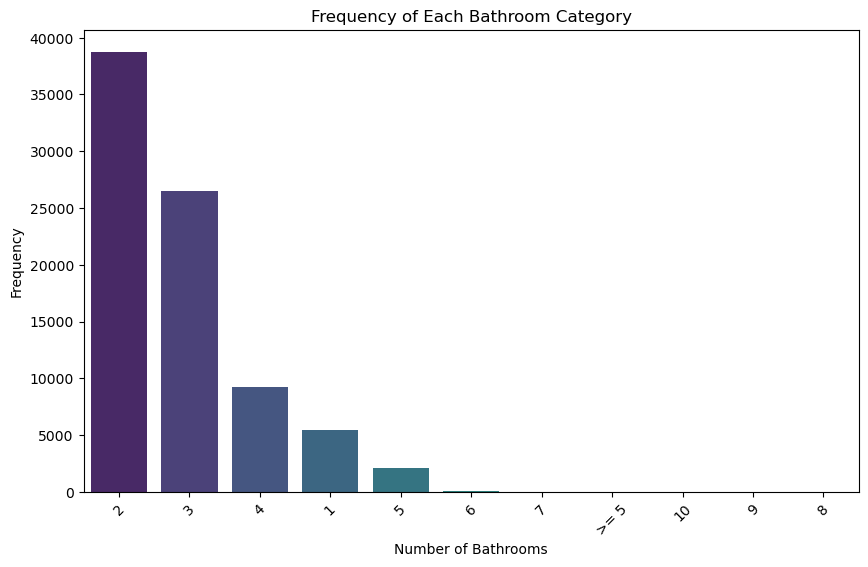

In [27]:
# Replace '> 10' with a numeric value (or keep it as is if you want to count it)
housing['Bathroom'].replace('', np.nan, inplace=True)

housing_copy['Bathroom'] = housing_copy['Bathroom'].replace({'> 10': '11'})

# Count occurrences of each category
bathroom_counts = housing_copy['Bathroom'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=bathroom_counts.index, y=bathroom_counts.values, palette='viridis')
plt.title('Frequency of Each Bathroom Category')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [50]:
# Replace '> 10' and any value greater than 4 with '>= 5'

housing['Bathroom'] = housing['Bathroom'].replace({'11': '>= 5'})
housing['Bathroom'] = housing['Bathroom'].astype(int)  # Convert to numeric for comparison

# Categorize the bathrooms
housing['Bathroom'] = pd.cut(housing['Bathroom'], 
                              bins=[0, 1, 2, 3, 4, float('inf')], 
                              labels=['1', '2', '3', '4', '>= 5'], 
                              right=True)

# Convert to categorical type
housing['Bathroom'] = pd.Categorical(housing['Bathroom'])

housing['Bathroom']

ValueError: invalid literal for int() with base 10: ''

12. Balcony - change to categorical variables (lots of NA)

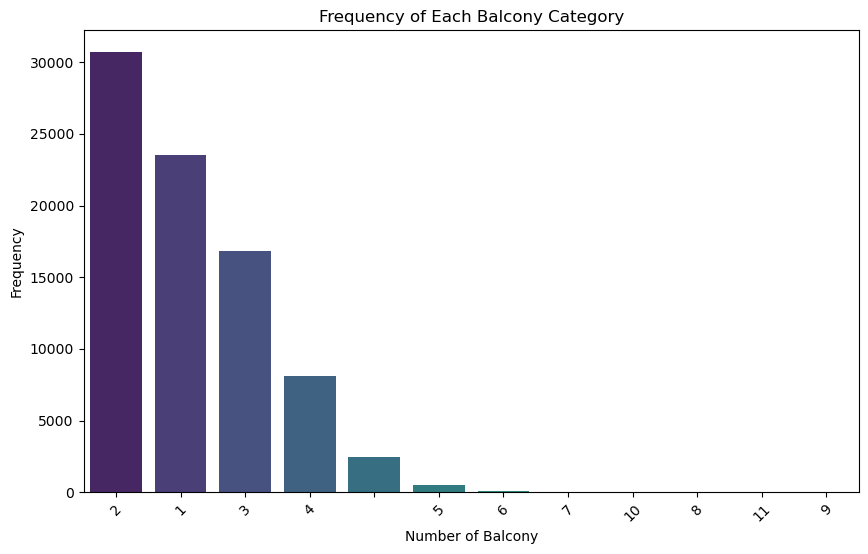

In [23]:
# Replace '> 10' with a numeric value (or keep it as is if you want to count it)
housing['Balcony'].replace('', np.nan, inplace=True)

housing['Balcony'] = housing['Balcony'].replace({'> 10': '11'})

# Count occurrences of each category
bathroom_counts = housing['Balcony'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=bathroom_counts.index, y=bathroom_counts.values, palette='viridis')
plt.title('Frequency of Each Balcony Category')
plt.xlabel('Number of Balcony')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Replace '> 10' with '>= 5' and handle empty strings and other non-numeric values
housing['Balcony'] = housing['Balcony'].replace({'> 10': '>= 5', '': None, 'Not Available': None})

# Convert to numeric, coercing errors to NaN
housing['Balcony'] = pd.to_numeric(housing['Balcony'], errors='coerce')

# Categorize the balconies, including handling NaN values
housing['Balcony'] = pd.cut(housing['Balcony'], 
                             bins=[0, 1, 2, 3, 4, float('inf')], 
                             labels=['1', '2', '3', '4', '>= 5'], 
                             right=True)

# Convert to categorical type
housing['Balcony'] = pd.Categorical(housing['Balcony'])

# Display the updated DataFrame
print(housing['Balcony'])

0           2
1         NaN
2         NaN
4         NaN
6         NaN
         ... 
187522      3
187523      3
187524      2
187525      2
187528      2
Name: Balcony, Length: 82261, dtype: category
Categories (5, object): ['1' < '2' < '3' < '4' < '>= 5']


13. Car Parking - Probably change to categorical column (1 for have parking and covered, 2 for have parking but open, and 0 for no parking)

In [26]:
housing['Car Parking'].unique()

array(['', '1 Open', '1 Covered', '2 Covered', '66 Covered',
       '701 Covered', '3 Covered', '1 Covered,', '323 Covered',
       '11 Covered', '103 Open', '203 Covered', '2 Open', '180 Covered',
       '101 Covered', '4 Covered', '123 Covered', '505 Covered',
       '402 Covered', '6 Covered', '5 Covered', '2 Covered,',
       '3 Covered,', '202 Covered', '20 Covered,', '503 Open', '3 Open',
       '4 Covered,', '147 Covered', '310 Covered', '401 Covered',
       '302 Covered', '442 Covered', '201 Covered,', '8 Open',
       '112 Covered', '706 Covered', '107 Covered', '250 Covered',
       '4 Open', '217 Covered', '12 Covered', '536 Covered', '53 Open',
       '6 Covered,', '12 Open', '20 Open', '89 Open', '604 Covered',
       '87 Covered', '903 Covered', '704 Covered', '30 Covered,',
       '39 Covered', '34 Covered', '8 Covered', '305 Covered',
       '103 Covered', '406 Open', '129 Open', '201 Covered', '15 Covered',
       '100 Covered', '324 Covered', '300 Covered', '21 Cover

Feel like this should have some special operations

14. Ownership

In [27]:
# Replace empty strings with NaN
housing['Ownership'].replace('', np.nan, inplace=True)

# Count the number of NaN values in the 'Ownership' column
na_count = housing['Ownership'].isna().sum()

# Print the count of NaN values
print(f"Number of NaN values in 'Ownership': {na_count}")

# Convert the 'Ownership' column to a categorical type, keeping NaN values
housing['Ownership'] = pd.Categorical(housing['Ownership'])


Number of NaN values in 'Ownership': 13129


In [28]:
print(housing['Ownership'])

0                          NaN
1                     Freehold
2                     Freehold
4         Co-operative Society
6                          NaN
                  ...         
187522                Freehold
187523                Freehold
187524                Freehold
187525                Freehold
187528                Freehold
Name: Ownership, Length: 82261, dtype: category
Categories (4, object): ['Co-operative Society', 'Freehold', 'Leasehold', 'Power Of Attorney']


In [37]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82261 entries, 0 to 187528
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Index              82261 non-null  int64   
 1   Title              82261 non-null  object  
 2   Description        82261 non-null  object  
 3   Amount(in rupees)  82261 non-null  float64 
 4   Price (in rupees)  82261 non-null  float64 
 5   location           82261 non-null  category
 6   Carpet Area        82261 non-null  float64 
 7   Status             82261 non-null  int64   
 8   Transaction        82258 non-null  category
 9   Furnishing         82242 non-null  category
 10  facing             69094 non-null  category
 11  overlooking        63420 non-null  category
 12  Society            82261 non-null  object  
 13  Bathroom           82261 non-null  object  
 14  Balcony            82261 non-null  object  
 15  Car Parking        82261 non-null  object  
 16  Ownershi

In [38]:
# Check for datatype and corresponding missing values again 
na_rows = housing.isna().sum(axis=0)
na_rows

Index                    0
Title                    0
Description              0
Amount(in rupees)        0
Price (in rupees)        0
location                 0
Carpet Area              0
Status                   0
Transaction              3
Furnishing              19
facing               13167
overlooking          18841
Society                  0
Bathroom                 0
Balcony                  0
Car Parking              0
Ownership            13129
Super Area           82261
Dimensions               0
Plot Area                0
Current Floor            0
Total Floors             0
Garden/Park              0
Main Road                0
Pool                     0
dtype: int64